<a href="https://colab.research.google.com/github/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/tema5/aprendizaje_supervisado_tema5_LORG_DT_version_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Logística:

Como se ha mencionado, algunos algoritmos de regresión pueden ser usados para el problema de clasificación. La **Regresión Logística** se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular.

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresión logística, tenemos entonces que el problema de clasificación binario se trata de la siguiente forma:

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

Sin entrar en detalles, la probabilidad estimada de $y$ dado x, es tal que

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

En donde, $\sigma(.)$ representa la función logística, o sigmoide, mediante la cual se obtiene un resultado que esta entre 0 y 1. En la regresión logística **la probabilidad se ajusta a una función sigmoide/logística para realizar el mapeo a probabilidades**. Esta función está definida por la ecuación:

\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}

Veamos la apariencia que presenta esta función:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función sigmoide/logística:

def sigmoide(x):
    output = np.exp(x)/(1+np.exp(x))
    return output

Text(0.5, 1.0, 'Función logística o sigmoide')

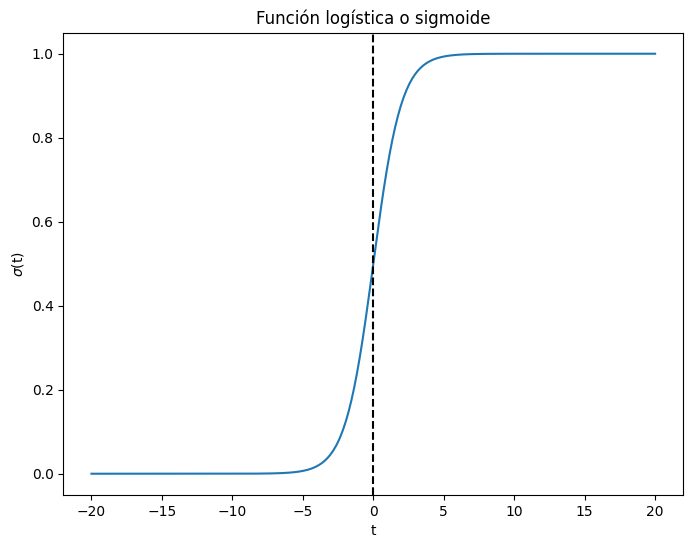

In [2]:
x = np.linspace(-20,20,400)
y=sigmoide(x)

plt.figure(figsize=(8,6))

plt.plot(x,y)
plt.axvline(x=0,color='k',linestyle='--')
plt.xlabel("t")
plt.ylabel("$\sigma$(t)")
plt.title("Función logística o sigmoide")

obre la función sigmoide podemos advertir varias cosas:

* La función sigmoide tiende rápidamenta a cero para valores negativos.
* La función sigmoide tiende rápidamente a 1 para valores positivos.
* $\sigma(t)<0.5$ si $t<0$.
* $\sigma(t)\geq0.5$ si $t\geq0$.

De los dos últimos ítems se tiene que nuestro modelo de regresión logística predice un valor 1 si $\mathbf{x}^T\mathbf{w}$ es positivo y cero si es negativo.

### Regresión logística vs regresión lineal

Recordemos que en la **regresión lineal** se determina una función que relaciona a una variable dependiente continua, con algunos predictores (variables independientes $x_1$, $x_2$, etc.). Por ejemplo, en la regresión lineal multiple se asume una función de la forma:


\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

en la que se determinan los valos de los parámetos $w$'s que minimizan el error. Lo anterior puede generalizarse como:


\begin{equation}
ℎ_w(𝑥) = \mathbf{x}^T\mathbf{w}
\end{equation}

La regresión logística es una variación de la regresión lineal, la cual resulta útil en los casos en que la variable dependiente, $\mathbf{y}$, es categórica. Como se mencionó, la regresión logística produce un resultado de la probabilidad que una instancia pertenezca a un clase dada.

La regresión logística ajusta entonces una curva en forma de "S", tomando la regresión lineal ($\mathbf{x}^T\mathbf{w}$) y transformando la estimación numérica en una probabilidad (entre 0 y 1), mediante la función sigmoide:

$$
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {e^{(w_0 + w_1  x_1 + w_2  x_2 +...)}}{1 + e^{(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}}
$$
Or:
$$
\text{Probabilidad_Clase_1} =  P(Y=1|X) = \sigma({\mathbf{x}^T\mathbf{w}}) = \frac{e^{\mathbf{x}^T\mathbf{w}}}{1+e^{\mathbf{x}^T\mathbf{w}}}
$$

En esta ecuación se tiene que, $\mathbf{x}^T\mathbf{w}$ es el resultado de la regresión (es decir, la suma de las variables/características pesadas por los coeficientes), `exp` representa la función exponencial, $\sigma(\mathbf{x}^T\mathbf{w})$ es la [función logística](http://en.wikipedia.org/wiki/Logistic_function).

De forma sucinta, la regresión logística toma la entrada (argumento) de la función sigmoide/logística y para obtener un resultado de probabilidades:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

**Nota**: No deje confundirse visualmente pensando que la sigmoide corresponde a la frontera de decisición. Los datos que se muestran en la gráfica anterior corresponden a dos grupos (0 y 1), y el ajuste lineal de estos es el que se pasa a la función sigmoide para mapearlos a probabilidades


El proposito del algoritmo de __Regresión Lógistica__ es el de encontrar los parámetros $\mathbf{w}$, para  $ℎ_w(𝑥)$ = $\sigma(\mathbf{x}^T\mathbf{w})$, de tal forma que el modelo prediga más precisamente la clase en cada caso.

El modelo de regresión logística representa entonces un algoritmo apliamente usado en clasificación binaria, en los casos en que la frontera de decisión sea lineal.

Veamos a continuación el desempeño de la regresión logistica en la clasificación de tres distribuciones:

* Regresión logística en un problema de clasificación binaria con una frontera de decisición lineal.
* Regresión logística en un problema de clasificación binaria con una forntera de desición no lineal.

### Regresión logística en un problema de clasificación binaria con una frontera de decisión lineal.

Para evaluar los casos en el que una regresión logística tiene un buen desempeño, veamos las siguientes distribuciónes de datos generadas en python:

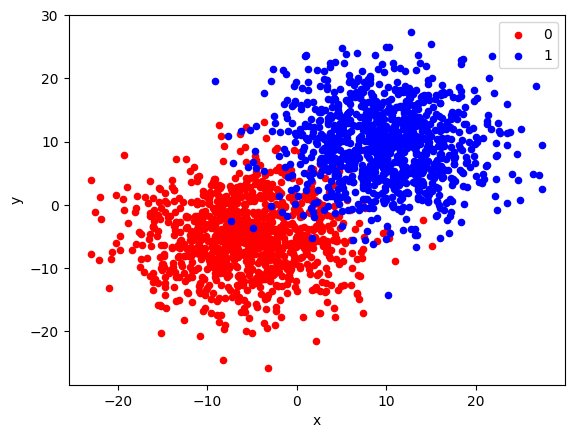

In [3]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import DataFrame

# Generación de un dataset de clasificación 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

La **apariencia del dataset** es la de una tabla con dos características, o variables independientes, y una variable objetivo, o variable dependiente:

In [4]:
df.head(10)

,x,y,label
0,3.638509,10.367086,1
1,19.869574,6.554166,1
2,-3.596134,0.146057,0
3,-11.827598,-8.025380,0
4,-3.935786,-11.372476,0
5,0.016425,-4.886311,0
6,-4.616008,-5.792576,0
7,-3.427720,-16.442486,0
8,-9.197854,-3.219251,0
9,24.958239,0.800719,1


Las variables independiente están etiquetadas en las columnas como las "características" $\mathbf{x}$ e $\mathbf{y}$, a pesar de que hemos insistido a lo largo del curso reservar la letra $\mathbf{y}$ para la variable objetivo o dependiente. En este caso, la variable objetivo está etiquetada como **label**.

A continuación, veamos los resultados de la clasificación derivada de una regresión logística. Los datos son graficados sobre un contorno que representa la probabilidad de pertenecer a una clase u otra:
 * Los tonos rojos, corresponden a regiones de probalidad menores a 0.5 de pertenecer a la clase 1.
 * Los tonos azules, corresponden a regiones de probabilid  mayores a 0.5 de pertenecer a la clase 1.
 * Los valores en blanco, representan la forntera de decisión, es decir donde se obtiene una probabilidad del 0.5 de pertenencia a la clase 1.

Train set: (1600, 2) (1600,)
Test set: (400, 2) (400,)


[None,
 (-25.814445291719665, 27.365133706091257),
 (-22.981715497289997, 27.37181699382255),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

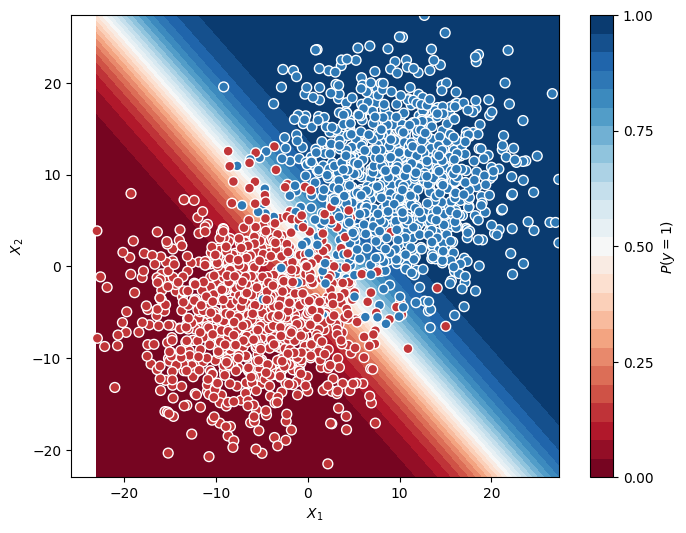

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# División de los datos en subconjuntos de entrenamiento/evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

Evaluemos ahora la presición del modelo creado mediante regresión logística, realizando una validación cruzada:

In [6]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con tres folds
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validación cruzada son:", cv_scores)


Los puntajes de la validación cruzada son: [0.96  0.96  0.945 0.95  0.94 ]


**Conclusión:** En los casos en donde la **frontera de decisión** corresponde a una **línea recta**, el algoritmo de desición logística presenta un excelente desempeño en la clasificación de los datos; de hecho, hemos obtenido un porcentaje de clasificaciones correctas del 95%, mediante una evaluación cruzada con tres folds.

### Regresión logística en un problema de clasificación binaria con frontera de decisión no lineal I.

Para evaluar los casos en el que una regresión logística tiene un buen desempeño, veamos el siguiente caso de distribución de datos generadas en python:

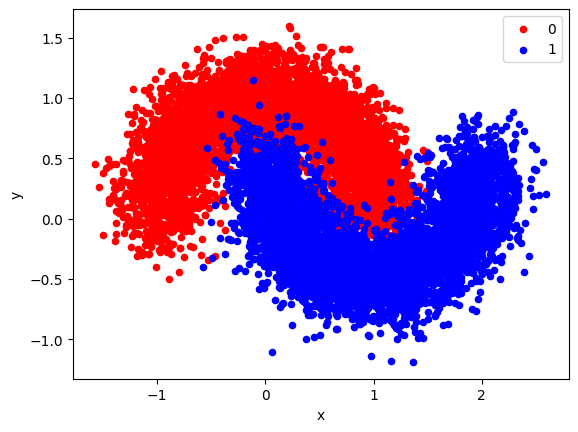

In [9]:
from sklearn.datasets import make_moons

# generate 2d classification dataset
X, y = make_moons(n_samples=10000, noise=0.2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


[None,
 (-1.5713465957178046, 2.596888499255756),
 (-1.1888579495334808, 1.598892333033265),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

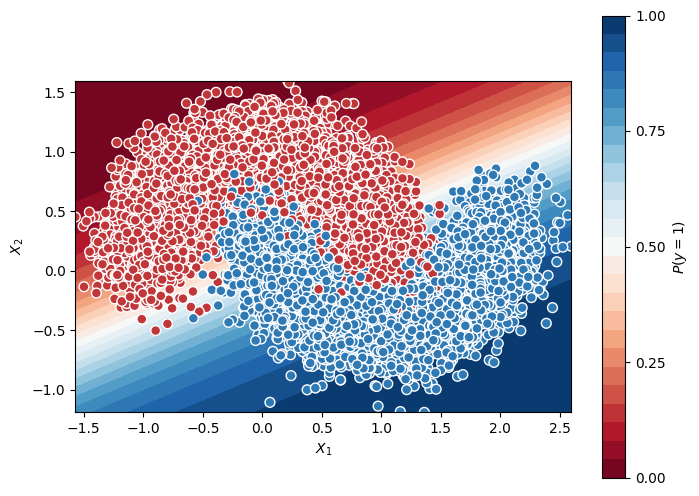

In [10]:
# División de los datos en subconjuntos de entrenamiento/evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

In [11]:
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validación cruzada son:", cv_scores)

Los puntajes de la validación cruzada son: [0.858  0.8555 0.849  0.865  0.87  ]


**Conclusión:** En los casos en donde la **frontera de decisión** no es lineal y los datos estan distribuidos en "cachos de luna", el algoritmo de desición logística presenta un desempeño menos preciso; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 86%, mediante una evaluación cruzada con tres folds.

### Regresión logística en un problema de clasificación binaria con frontera de decisión no lineal II.

Veamos un último caso en el que los datos están organizados en anillos:

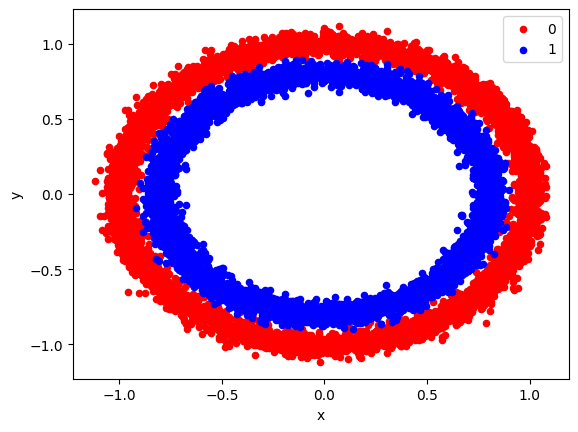

In [12]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=10000, noise=0.04)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


[None,
 (-1.116817177109427, 1.0821103025363192),
 (-1.1159281568169965, 1.1179848387830063),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

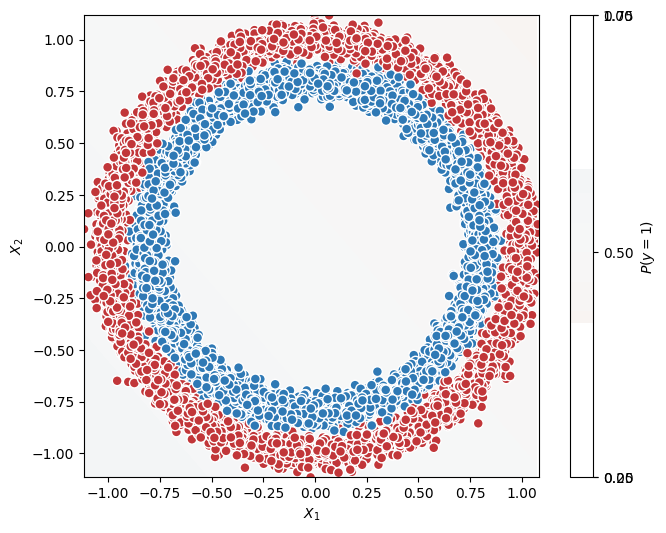

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

En este caso, asigna a todos los puntos una probabilidad cercana a 0.5, lo que indica una mala clasificación, ya que todos los puntos estarían dentro de la frontera de decisión.

In [14]:
cv_scores = cross_val_score(LR,X,y)

print("Los puntajes de la validación cruzada son:", cv_scores)

Los puntajes de la validación cruzada son: [0.4925 0.472  0.4965 0.4995 0.4835]


**Conclusión:** En los casos en donde la **frontera de decisión** no es lineal para datos distribuidos en anillos concentricos, el algoritmo de regresión logística presenta un desempeño muy pobre; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 49%, mediante una evaluación cruzada con tres folds.

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:
# Punto 1:

import numpy as np
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")
df.head()

# Punto 2

df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

# Punto 3

df.shape

# Punto 4

X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(df['churn'])

# Punto 5

X = preprocessing.StandardScaler().fit(X).transform(X)

# Punto 6.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear')
print(np.mean(cross_val_score(LR,X,y,cv=5)))
-->


# Árboles de decisión

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisiten en una secuencia de preguntas si/sinó (if/else) que llevan a la decisión final.






Suponga que se desea clasificar, con la menor cantidad de preguntas posibles, los siguientes cuatro animales: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear). Tan solo haciendo tres preguntas, en dos niveles, es posible identificar a que animal corresponde. Observe el siguiente diagrama.



<p><img alt="Colaboratory logo" height="300px" src="https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s10/desTreeAnimals.png" align="center" hspace="10px" vspace="0px"></p>



En lenguaje de ML podemos decir entonces que tenemos cuatro clases: Águila (Hawk), Pingüino (Penguin), Delfín (Dolphin) y Oso (Bear) y son necesarias las siguientes tres características para poder hacer la calsificación: tener plumas, poder volar y tener aletas. Cada nodo del digrama anterior es llamado hoja (*leaf*)

In [15]:
! pip install mglearn;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.8 MB/s eta 0:00:00


In [16]:
from sklearn.datasets import *
import numpy as np

import matplotlib.pyplot as plt
import mglearn

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X,y = make_moons(400, noise=0.1, random_state=10)

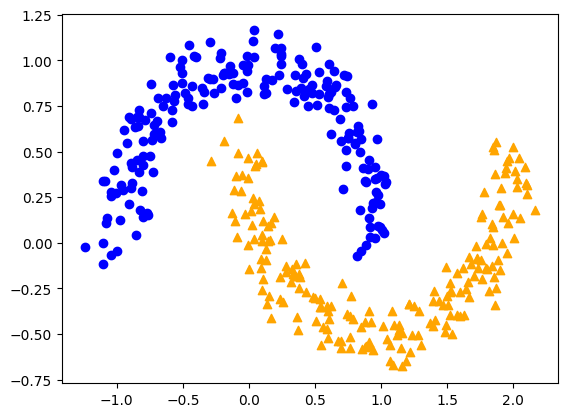

In [18]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="orange", marker='^')

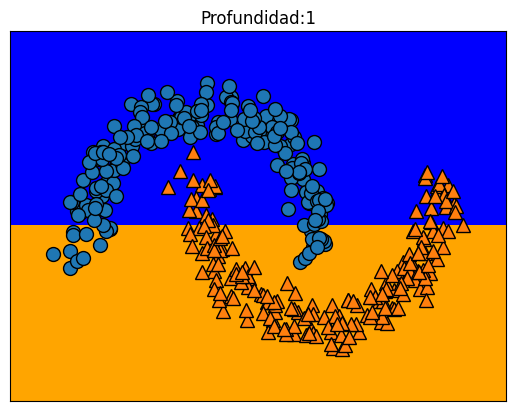

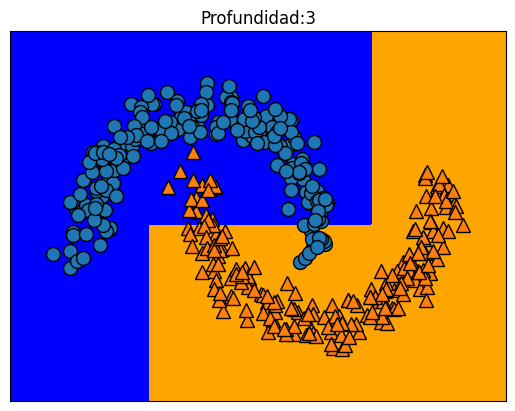

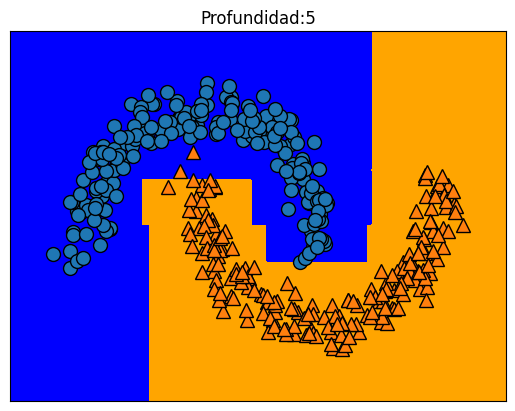

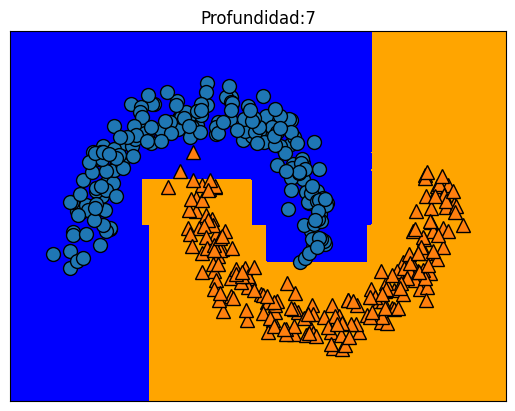

In [19]:
from matplotlib.colors import ListedColormap
for i in range(1,9,2):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X,y)

  plt.figure()
  mglearn.plots.plot_2d_classification(dt,X,fill=True, cm=ListedColormap(['blue','orange']))
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
  plt.title('Profundidad:'+str(i))
  plt.show()

La predicción de a qué clase pertenece un punto, depende entonces del lugar donde se encuentre en el espacio de características y pertenece a la clase mayoritaría, si solo hay una clase mayoritaria se dice que la hoja es pura (*pure leaf*). Veamos el digrama de árbol con profundidad 7 para ver como se hizo la clasificación.


[Text(0.3815789473684211, 0.9285714285714286, 'x[1] <= 0.181\ngini = 0.5\nsamples = 400\nvalue = [200, 200]'),
 Text(0.10526315789473684, 0.7857142857142857, 'x[0] <= -0.446\ngini = 0.22\nsamples = 183\nvalue = [23, 160]'),
 Text(0.05263157894736842, 0.6428571428571429, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.15789473684210525, 0.6428571428571429, 'x[1] <= -0.074\ngini = 0.12\nsamples = 171\nvalue = [11, 160]'),
 Text(0.10526315789473684, 0.5, 'gini = 0.0\nsamples = 126\nvalue = [0, 126]'),
 Text(0.21052631578947367, 0.5, 'x[0] <= 0.533\ngini = 0.369\nsamples = 45\nvalue = [11, 34]'),
 Text(0.15789473684210525, 0.35714285714285715, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.2631578947368421, 0.35714285714285715, 'x[0] <= 1.371\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.21052631578947367, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.3157894736842105, 0.21428571428571427, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 T

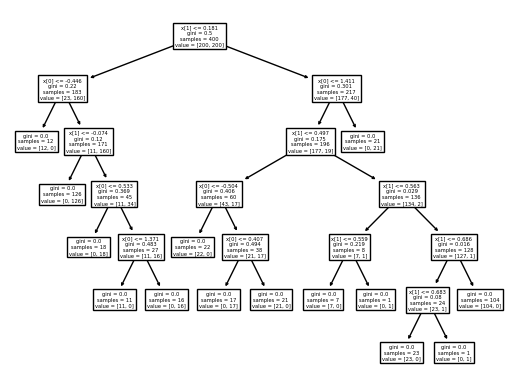

In [20]:
plot_tree(dt)

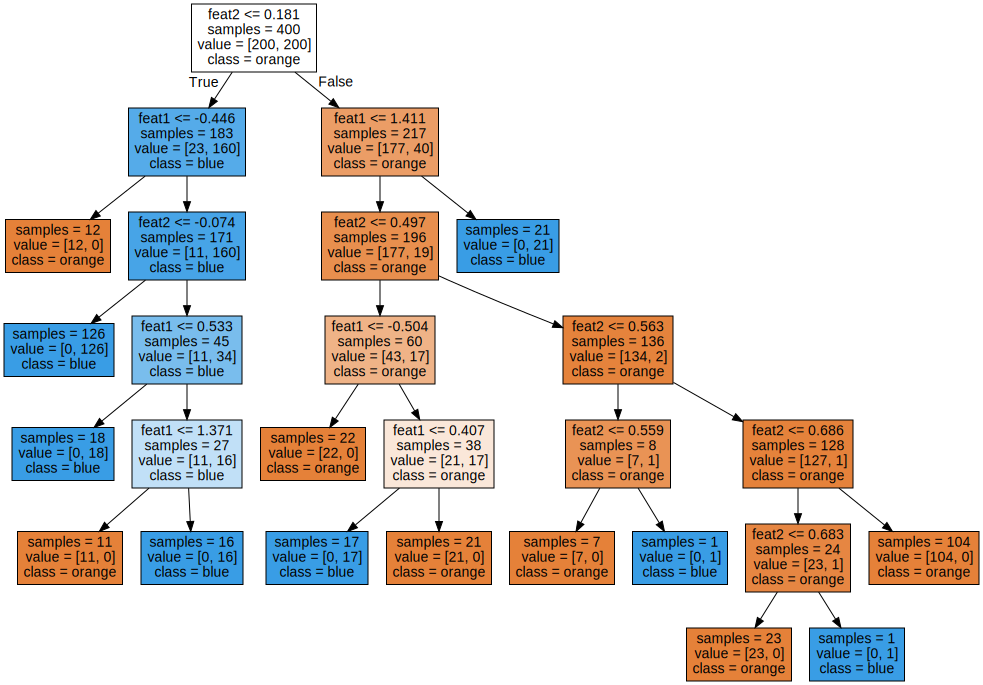

In [21]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file="tree.dot", class_names=["orange", "blue"],
  feature_names=["feat1", "feat2"], impurity=False, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)


Note que si el árbol evoluciona hasta que solo se tengan hojas puras, esto corresponde a un modelo de muy alta complejidad lo cual conlleva la aparición de sobreajuste, tal y como se ve en la figura de clasificación con profundidad 7.


Existen dos estrategias comunes para prevenir el sobreajuste. La primera, llamada pre-podado (pre-pruning), consiste en detener la evolución del árbol, por ejemplo limitando el número de capas (profundidad), el número de hojas o exigiendo un número mínimo de puntos por nodo para proceder a dividirlo. La segunda estrategia se llama post-podado (post-pruning), la cual consiste en remover o fusionar nodos que contienen poca información. La primera se puede implementar facilmente en sklearn con alguno de los hiperparámetros `max_depth` (profundidad del árbol), `max_leaf_nodes` (número máximo de nodos hoja), o `min_samples_split` (número mínimo de muestras que debe tener el nodo antes de dividise), entre otros. Normalmente, fijando alguno de esos parámetros es suficiente para evitar el sobreajuste.

Veamos ahora el método usado por los árboles de decisión para tomar la importancia de las características. Existen dos métodos principales: usando el coeficiente de Gini o la entropía. Para seleccionar el método a usar en `sklearn` podemos invocar `criterion='gini'` o `criterion='entropy'`.

Sin entrar en detalle matemáticos, podemos decir que ambas métricas evalúan la inhomogeneidad de los datos. El objetivo es entonces encontrar las características que permitan obtener nodos más puros, es decir, menos inhomogéneos en cada etapa de la decisión. Para ver la importancia de las caracteríticas es posible usar `feature_importances_`. Para el ejemplo de juguete que hemos venído trabajando veamos la importancia de las carcterísticas.



In [22]:
dt.feature_importances_

array([0.45779901, 0.54220099])

Vemos entonces que la segunda caraterística tiene mayor importancia que la primera, por eso el árbol mostrado en la diagrama de decisión de la figura de arriba inicia con esta caraterística.

Veamos ahora la importancia de carateríticas para un dataset mas complejo como el de cancer.

In [ ]:
cancer = load_breast_cancer()
X_can=cancer.data
y_can=cancer.target
X_can.shape, y_can.shape

((569, 30), (569,))

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X_can, y_can, test_size=0.3, random_state=1)

In [ ]:
cancerTree=DecisionTreeClassifier().fit(X_can_train,y_can_train)
cancerTree.feature_importances_

array([0.        , 0.        , 0.        , 0.00715165, 0.01922756,
       0.        , 0.        , 0.02222751, 0.        , 0.        ,
       0.        , 0.00965473, 0.        , 0.00352815, 0.        ,
       0.        , 0.        , 0.        , 0.00893956, 0.        ,
       0.02896418, 0.09089597, 0.76575833, 0.02288528, 0.        ,
       0.        , 0.        , 0.02076709, 0.        , 0.        ])

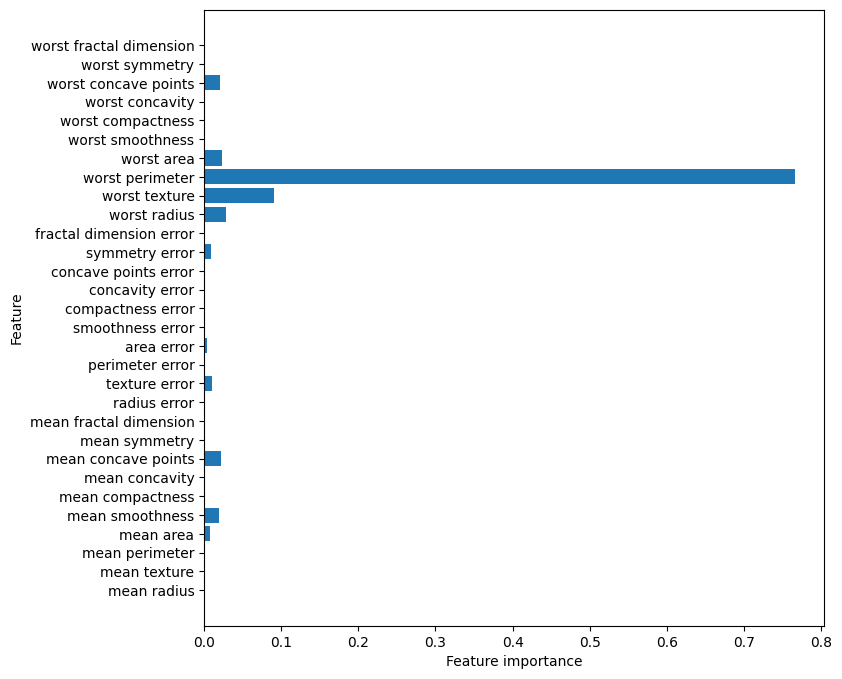

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(cancerTree)

In [ ]:
from sklearn import metrics
y_can_pred = cancerTree.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9415204678362573


Podemos decir como conclusión que los árboles de desición tienen dos ventajas respecto a los demás algoritmos. El modelo resultante puede ser comprendido y visualizado fácilmente y los algoritmos son independientes de la escala de los datos.

Por otro lado, la principal falencia es que los árboles de decisión suelen tender a sobreajustar los datos, incluso cuando se aplica el  pre-podado. Para evitarlo, es posible utilizar métodos de conjunto (ensemble methods) como los que veremos a continuación.